In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

SyntaxError: invalid syntax (pandas.py, line 10)

Reading Data from csv


    ID: Unique identifier for each patient.
    
    age: Age of the patient in days.
    
    age_years: Age of the patient in years (derived from age).
    
    gender: Gender of the patient. Categorical variable (1: Female, 2: Male).
    
    height: Height of the patient in centimeters.
    
    weight: Weight of the patient in kilograms.
    
    ap_hi: Systolic blood pressure.
    
    ap_lo: Diastolic blood pressure.
    
    cholesterol: Cholesterol levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
    
    gluc: Glucose levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
    
    smoke: Smoking status. Binary variable (0: Non-smoker, 1: Smoker).
    
    alco: Alcohol intake. Binary variable (0: Does not consume alcohol, 1: Consumes alcohol).
    
    active: Physical activity. Binary variable (0: Not physically active, 1: Physically active).
    
    cardio: Presence or absence of cardiovascular disease. Target variable. Binary (0: Absence, 1: Presence).
    
    bmi: Body Mass Index, derived from weight and height. Calculated as ( \text{BMI} = \frac{\text{weight (kg)}}{\text{height (m)}^2} ).
    
    bp_category: Blood pressure category based on ap_hi and ap_lo. Categories include "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", and "Hypertensive Crisis".
    
    bp_category_encoded: Encoded form of bp_category for machine learning purposes.
    

In [164]:
data = pd.read_csv('cardio_data_processed.csv')
df = data.copy()
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [165]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [166]:
df.shape

(68205, 17)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [168]:
cols_to_remove = ['age','bp_category_encoded','id']
df.drop(cols_to_remove,axis = 1 , inplace = True)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


Data Preprocessing

In [169]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

In [170]:
df.isnull().sum()

gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
bmi            0
bp_category    0
dtype: int64

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       68205 non-null  int64  
 1   height       68205 non-null  int64  
 2   weight       68205 non-null  float64
 3   ap_hi        68205 non-null  int64  
 4   ap_lo        68205 non-null  int64  
 5   cholesterol  68205 non-null  int64  
 6   gluc         68205 non-null  int64  
 7   smoke        68205 non-null  int64  
 8   alco         68205 non-null  int64  
 9   active       68205 non-null  int64  
 10  cardio       68205 non-null  int64  
 11  age_years    68205 non-null  int64  
 12  bmi          68205 non-null  float64
 13  bp_category  68205 non-null  object 
dtypes: float64(2), int64(11), object(1)
memory usage: 7.3+ MB


In [172]:
df.shape

(68205, 14)

In [173]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


<Axes: xlabel='cardio', ylabel='count'>

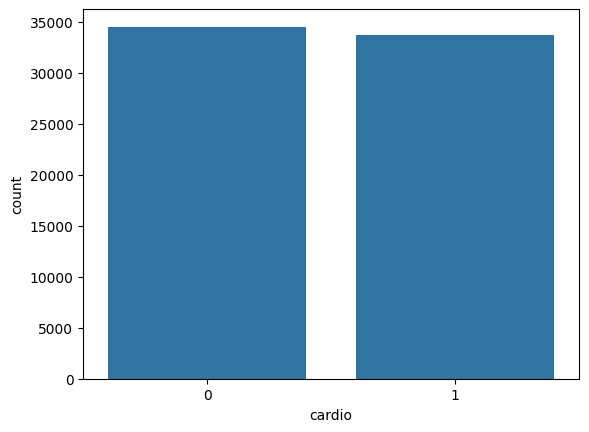

In [174]:
sns.countplot(data=df,x='cardio')

In [175]:
df['cardio'].value_counts()

cardio
0    34533
1    33672
Name: count, dtype: int64

Correlation

In [176]:
df.columns


Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

In [177]:
# Numerical = []
# Categoricaal = []

# for col in df:
#    if df[col].dtype != 'o':
#         Numerical.append(col)
#    else:
#         Categorical.append(col)

categorical = ['gender', 'cholesterol' , 'gluc' , 'smoke',
               'alco' , 'active' , 'cardio' , 'bp_category' ]

numerical = [col for col in df.columns if col not in categorical]
numerical


['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']

In [178]:
corr = df[numerical].corr()

In [179]:
corr = df[numerical].corr()

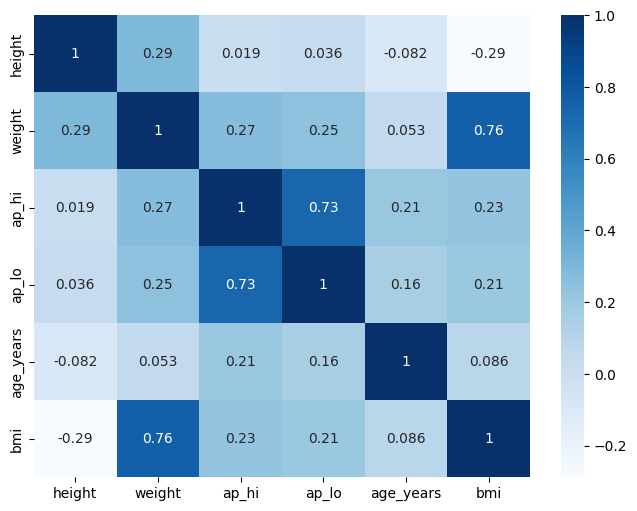

In [180]:
plt.figure(figsize=(8,6))
sns.heatmap(corr , annot = True,cmap='Blues')
plt.savefig('correaltion-heatmap.jpg')

Columns Distribution and Outliers

In [181]:
numerical

['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']

In [183]:
categorical

['gender',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio',
 'bp_category']

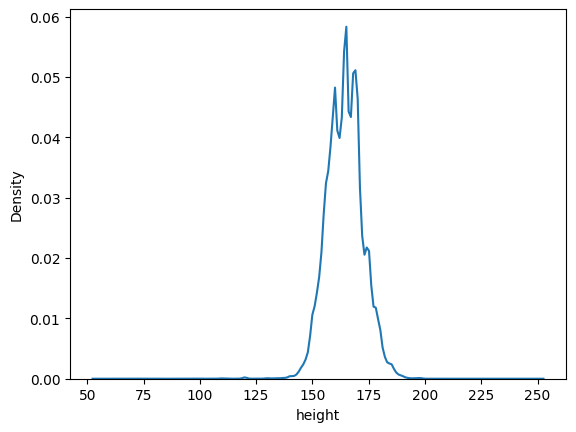

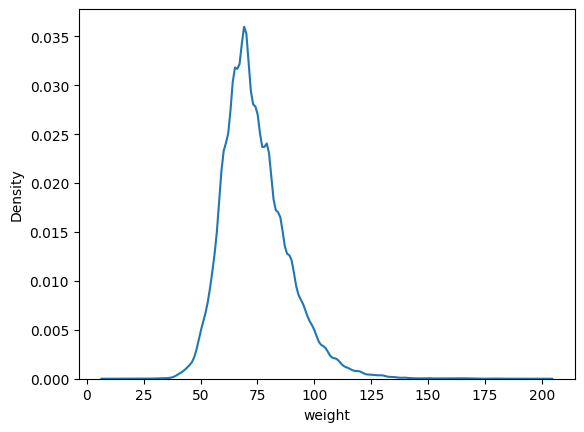

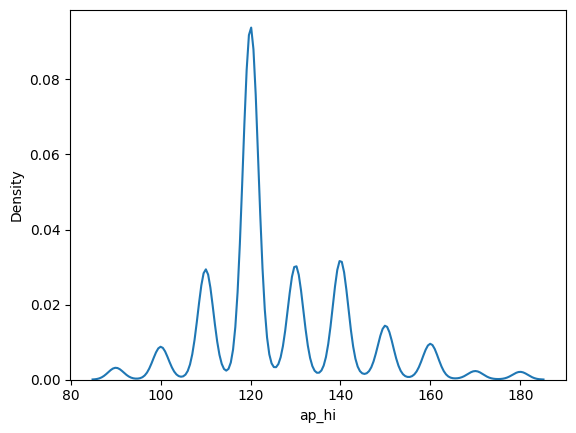

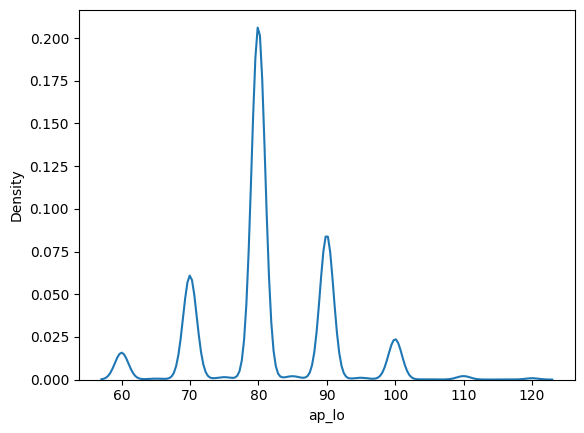

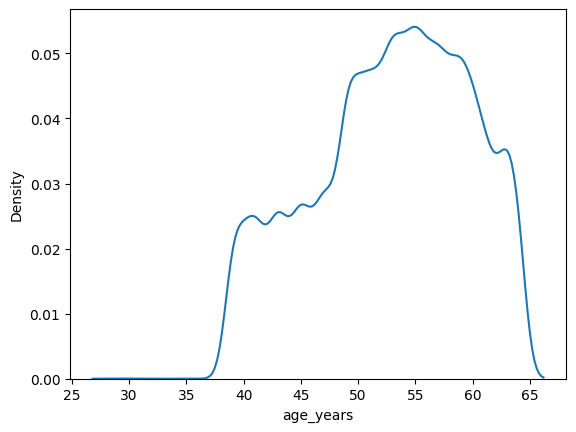

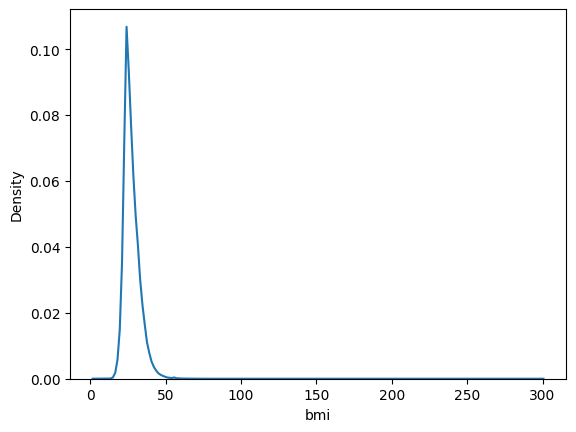

In [184]:
for col in numerical:
    plt.figure()
    sns.kdeplot(df[col])

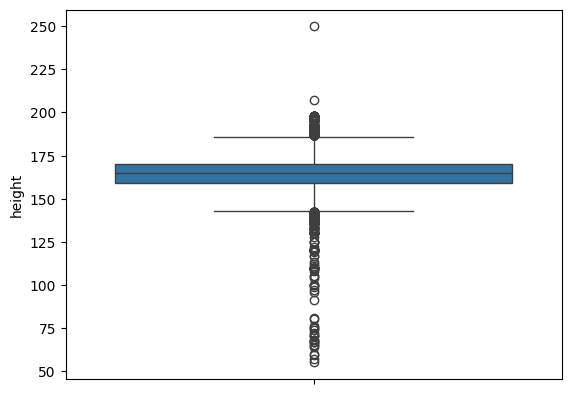

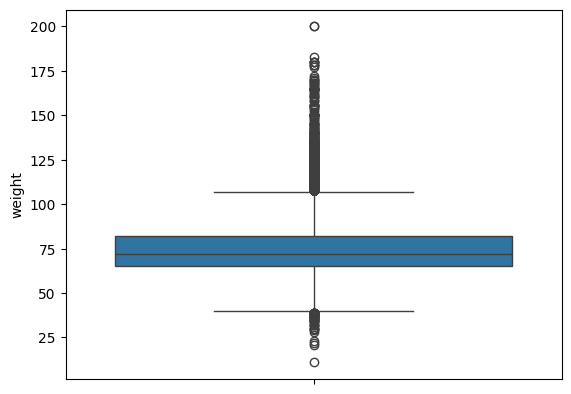

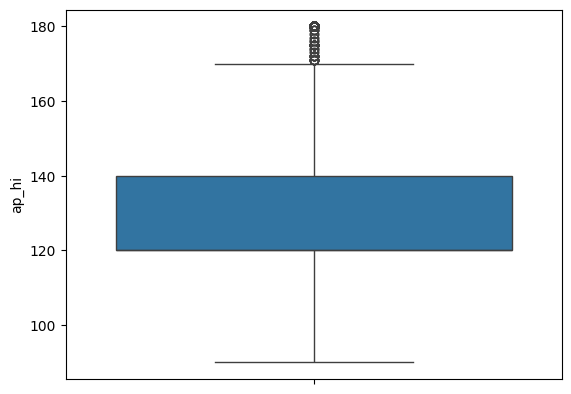

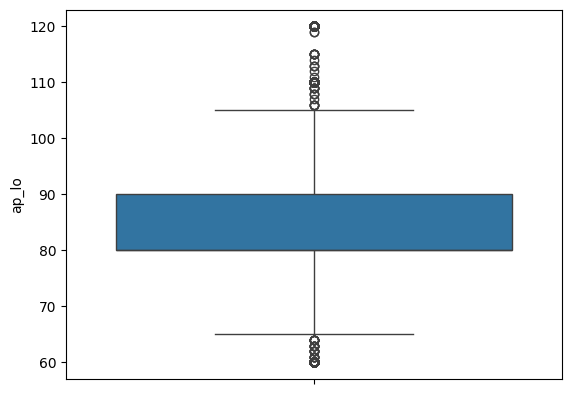

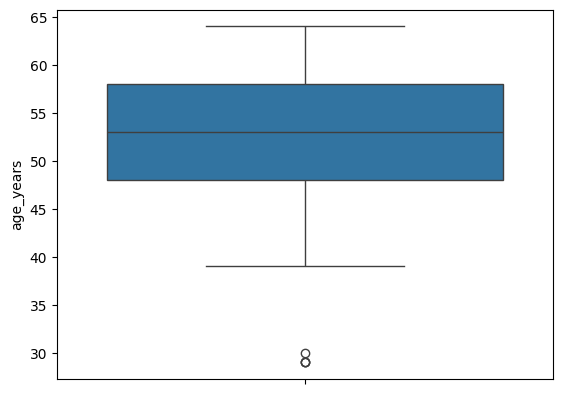

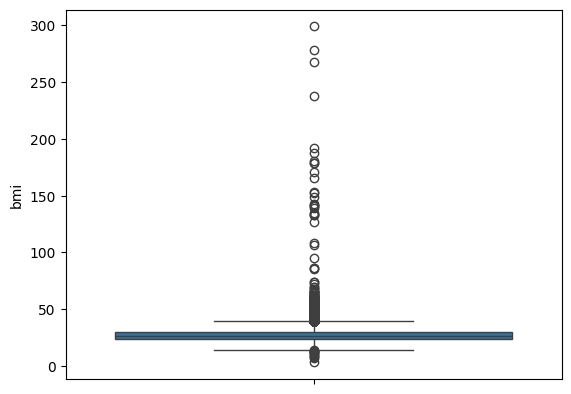

In [185]:
for col in numerical:
    plt.figure()
    sns.boxplot(df[col])


Height Column

<Axes: ylabel='height'>

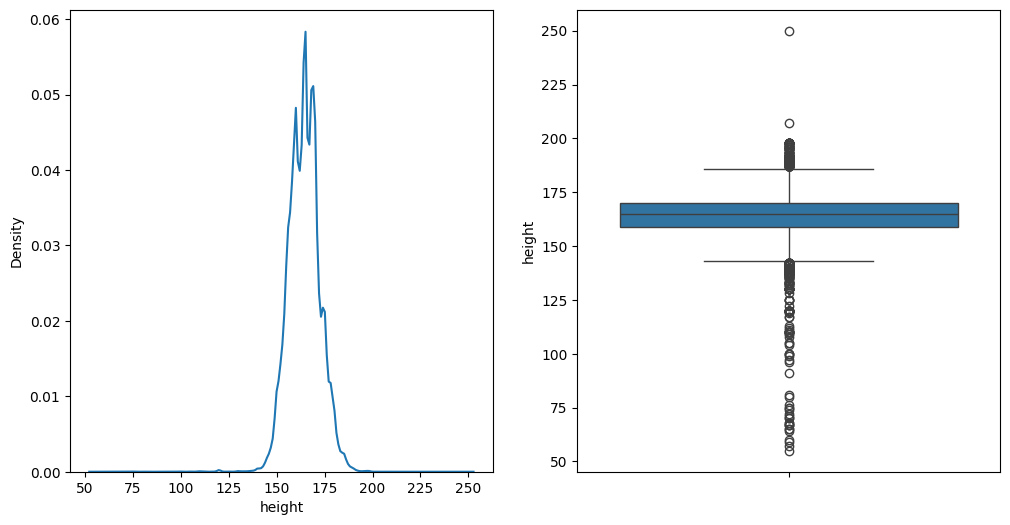

In [186]:
fig,axs = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)
sns.kdeplot(df['height'],ax=axs[0])
sns.boxplot(df['height'],ax=axs[1])

In [187]:
# IQR, Boundary Values, pciles, yeojohnson

df['height_log'] = np.log1p(df['height'])

<Axes: ylabel='height_log'>

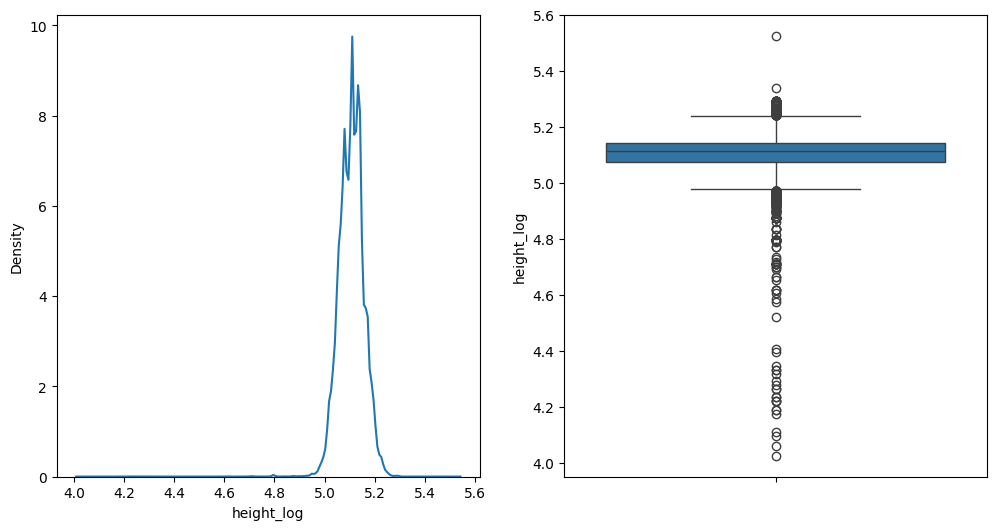

In [188]:
fig,axs = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)
sns.kdeplot(df['height_log'],ax=axs[0])
sns.boxplot(df['height_log'],ax=axs[1])

<Axes: ylabel='height_yj'>

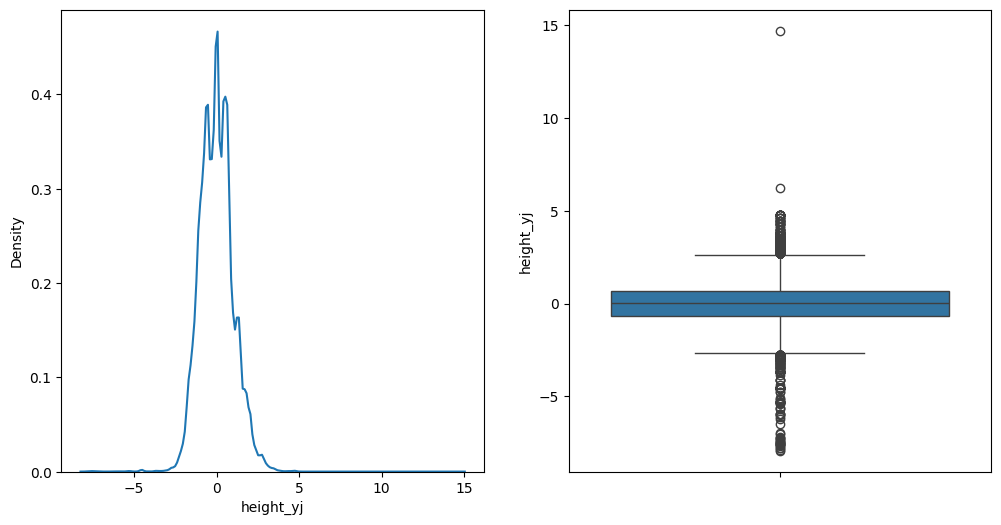

In [189]:
pt = PowerTransformer()

df['height_yj'] = pt.fit_transform(df['height'].values.reshape(-1,1))

fig,axs = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)
sns.kdeplot(df['height_yj'],ax=axs[0])
sns.boxplot(df['height_yj'],ax=axs[1])

In [190]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,height_log,height_yj
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,5.129899,0.421536
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,5.056246,-1.036468
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,5.111988,0.042828
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,5.135798,0.549899
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,5.056246,-1.036468


In [191]:
df.drop(df.columns[-2:],axis=1,inplace=True)

In [192]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


In [193]:
df.shape

(68205, 14)

Splitting the data

In [194]:
x = df.drop('cardio',axis=1)
y =df['cardio']

In [195]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75)

In [196]:
x_train.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category
6592,1,152,76.0,120,80,1,1,0,0,1,56,32.894737,Hypertension Stage 1
59533,2,160,55.0,120,80,1,1,0,0,1,49,21.484375,Hypertension Stage 1
47712,1,163,73.0,120,80,2,2,0,0,0,47,27.475629,Hypertension Stage 1
30939,1,162,47.0,120,80,1,1,0,0,1,63,17.908855,Hypertension Stage 1
68091,1,159,62.0,160,100,1,1,0,0,1,61,24.524346,Hypertension Stage 2


Scaling the numerical Columns 

In [197]:
numerical

['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']

In [198]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


In [199]:
ct = ColumnTransformer(transformers=[('robsc',RobustScaler(),numerical),
                                     ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),['bp_category'])],
                        remainder='passthrough')

In [200]:
x_train_transformerd = ct.fit_transform(x_train)

In [ ]:
#cte = ColumnTransformer(transformers=[
 #   ('robsc',RobustScaler(),Numerical),
  #  ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),['bp_category'])},
# remainder='passthrough')


In [201]:
x_train_transformerd

array([[-1.18181818,  0.23529412,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.45454545, -1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.18181818,  0.05882353,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.54545455, -0.64705882,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.09090909,  1.05882353,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.54545455,  1.47058824,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [203]:
ct.get_feature_names_out()

array(['robsc__height', 'robsc__weight', 'robsc__ap_hi', 'robsc__ap_lo',
       'robsc__age_years', 'robsc__bmi',
       'ohe__bp_category_Hypertension Stage 1',
       'ohe__bp_category_Hypertension Stage 2', 'ohe__bp_category_Normal',
       'remainder__gender', 'remainder__cholesterol', 'remainder__gluc',
       'remainder__smoke', 'remainder__alco', 'remainder__active'],
      dtype=object)

In [204]:
df_frame = pd.DataFrame(data = x_train_transformerd,columns =  ct.get_feature_names_out())
df_frame

,robsc__height,robsc__weight,robsc__ap_hi,robsc__ap_lo,robsc__age_years,robsc__bmi,ohe__bp_category_Hypertension Stage 1,ohe__bp_category_Hypertension Stage 2,ohe__bp_category_Normal,remainder__gender,remainder__cholesterol,remainder__gluc,remainder__smoke,remainder__alco,remainder__active
0,-1.181818,0.235294,0.0,0.0,0.3,1.057051,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1,-0.454545,-1.000000,0.0,0.0,-0.4,-0.771211,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0
2,-0.181818,0.058824,0.0,0.0,-0.6,0.188757,1.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0
3,-0.272727,-1.470588,0.0,0.0,1.0,-1.344110,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
4,-0.545455,-0.588235,2.0,2.0,0.8,-0.284122,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51148,-0.090909,0.117647,0.5,0.0,1.0,0.194807,1.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0
51149,-0.454545,-0.764706,2.0,2.0,0.9,-0.520854,0.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0
51150,-0.545455,-0.647059,0.0,0.0,0.9,-0.347501,1.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,1.0
51151,-0.090909,1.058824,0.0,0.0,-1.1,1.147979,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0


In [205]:
x_test_transformerd = ct.transform(x_test)

In [206]:
#x_train_transformed.shape
x_train_transformerd.shape

(51153, 15)

In [207]:
ct.get_feature_names_out()

array(['robsc__height', 'robsc__weight', 'robsc__ap_hi', 'robsc__ap_lo',
       'robsc__age_years', 'robsc__bmi',
       'ohe__bp_category_Hypertension Stage 1',
       'ohe__bp_category_Hypertension Stage 2', 'ohe__bp_category_Normal',
       'remainder__gender', 'remainder__cholesterol', 'remainder__gluc',
       'remainder__smoke', 'remainder__alco', 'remainder__active'],
      dtype=object)

Training The Model

* Decision Tree Classifier
* RandomForest
* Xgboost

In [212]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

Decision Tree

In [213]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train_transformerd,y_train)
pred = dtc.predict(x_test_transformerd)

In [ ]:
# y_train_enc = enc.fit_transform(y_train)

# y_test_enc = enc.transform(y_test)

In [214]:
pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
# Importing  Classification Model
from sklearn.linear_model import LogisticRegression


In [215]:
accuracy = accuracy_score(y_test,pred)
recall = recall_score(y_test,pred)

cm = confusion_matrix(y_test,pred)

In [216]:
print(accuracy)
print(recall)

0.6382242552193291
0.6242614252984444


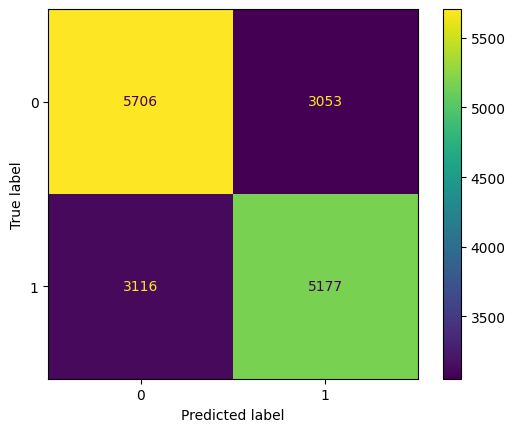

In [218]:
ConfusionMatrixDisplay(cm).plot()

In [220]:
dtc2 = DecisionTreeClassifier(max_depth=5,criterion='entropy')

dtc2.fit(x_train_transformerd,y_train)
pred = dtc2.predict(x_test_transformerd)

accuracy = accuracy_score(y_test,pred)
recall = recall_score(y_test,pred)

cm = confusion_matrix(y_test,pred)

In [222]:
print(accuracy)
print(recall)

0.729005395261553
0.6257084287953696


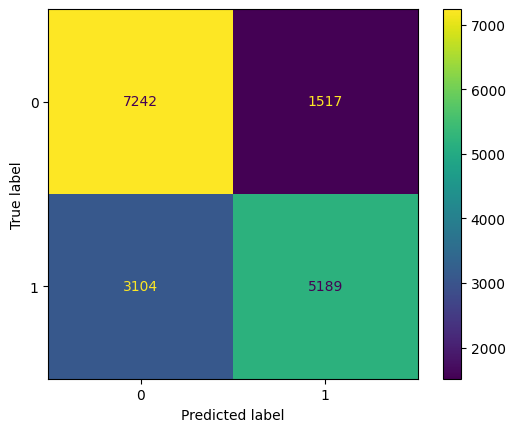

In [223]:
ConfusionMatrixDisplay(cm).plot()

HyperTuning Decision Tree

In [224]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [226]:
param_dict = {
                'criterion': ['gini','entropy'],
                'max_depth': [5,6,7],
                'max_features': [7,8,9,10,12,15],
                'min_samples_split': [8,10,12],
                }

randomcv = RandomizedSearchCV(dtc,param_distributions=param_dict)
randomcv.fit(x_train_transformerd,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7],
                                        'max_features': [7, 8, 9, 10, 12, 15],
                                        'min_samples_split': [8, 10, 12]})

In [227]:
cv_pred = randomcv.predict(x_test_transformerd)

cv_acc = accuracy_score(cv_pred,y_test)
print(cv_acc)

0.729005395261553


In [229]:
cv_pred = randomcv.predict(x_test_transformerd)

cv_rec = recall_score(cv_pred,y_test)
print(cv_rec)

0.7737846704443782


In [230]:
randomcv.best_params_

{'min_samples_split': 10,
 'max_features': 15,
 'max_depth': 5,
 'criterion': 'gini'}

In [231]:
best_dtc = randomcv.best_estimator_

In [233]:
best_dtc.fit(x_train_transformerd,y_train)
best_pred = best_dtc.predict(x_test_transformerd)
acc = accuracy_score(best_pred,y_test)
rec = recall_score(best_pred,y_test)
cm = confusion_matrix(best_pred,y_test)

0.729005395261553
0.7737846704443782


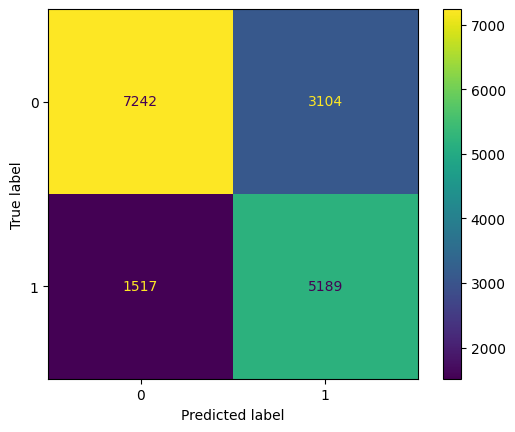

In [234]:
print(acc)
print(rec)
ConfusionMatrixDisplay(cm).plot()

In [235]:
best_dtc

DecisionTreeClassifier(max_depth=5, max_features=15, min_samples_split=10)

Prototyping for User input for unseen data

In [236]:
# best_dtc.predict()

x_train_transformerd.shape

(51153, 15)

In [237]:
x_train_transformerd.shape

(51153, 15)

In [238]:
x_train.shape

(51153, 13)

In [240]:
x_train.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

In [241]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [242]:
x_train.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

In [244]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()


In [248]:
rfc.fit(x_train_transformerd,y_train)
pred = rfc.predict(x_test_transformerd)

accuracy = accuracy_score(y_test,pred)
recall = recall_score(y_test,pred)

cm = confusion_matrix(y_test,pred)

0.7080694346704199
0.7004702761365007


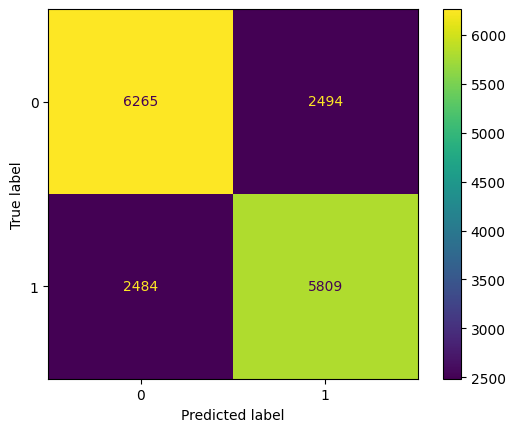

In [251]:
print(accuracy)
print(recall)
ConfusionMatrixDisplay(cm).plot()

In [252]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [253]:
params = {
        'criterion': ['gini','entropy'],
        'max_depth': [5,7,9,10,12,13],
        'min_samples_split': [5,7,8,10,12,15],
        'n_estimators': [50,100,120,150,170,200]}

In [254]:
randomised_cv = RandomizedSearchCV(param_distributions=params,estimator=rfc)

randomised_cv.fit(x_train_transformerd,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 7, 9, 10, 12, 13],
                                        'min_samples_split': [5, 7, 8, 10, 12,
                                                              15],
                                        'n_estimators': [50, 100, 120, 150, 170,
                                                         200]})

In [256]:
cv_pred = randomised_cv.predict(x_test_transformerd)

cv_acc = accuracy_score(cv_pred,y_test)
print(cv_acc)

0.7319376026272578


In [259]:
randomised_cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 12,
 'max_depth': 12,
 'criterion': 'gini'}

In [262]:
best_rfc = randomised_cv.best_estimator_

In [263]:
best_rfc.fit(x_train_transformerd,y_train)
best_pred = best_rfc.predict(x_test_transformerd)
acc = accuracy_score(best_pred,y_test)
rec = recall_score(best_pred,y_test)
cm = confusion_matrix(best_pred,y_test)

0.7341074360778794
0.7511022044088176


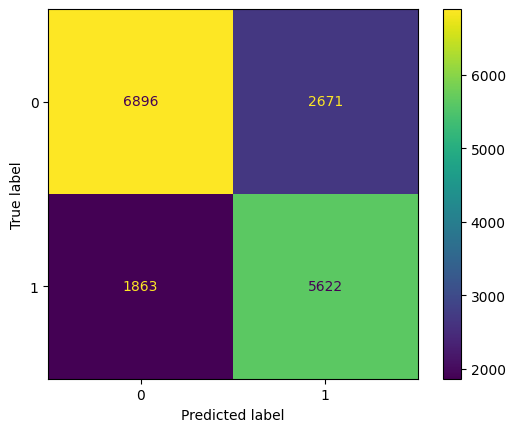

In [264]:
print(acc)
print(rec)
ConfusionMatrixDisplay(cm).plot()

In [265]:
best_rfc

RandomForestClassifier(max_depth=12, min_samples_split=12)

In [267]:
from xgboost import XGBClassifier

In [268]:
xgb = XGBClassifier()
xgb.fit(x_train_transformerd,y_train)
pred = xgb.predict(x_test_transformerd)
acc = accuracy_score(pred,y_test)
rec = recall_score(pred,y_test)
cm = confusion_matrix(pred,y_test)

0.7313511611541168
0.7414780119698152


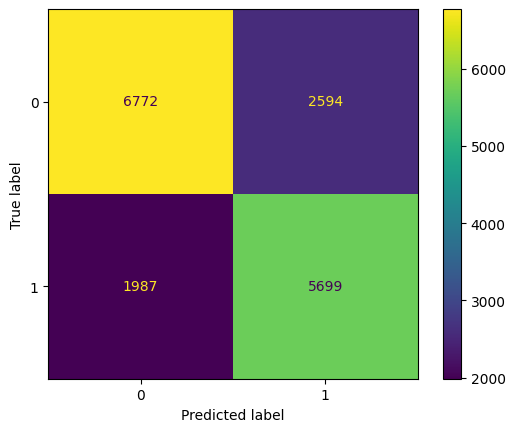

In [269]:
print(acc)
print(rec)
ConfusionMatrixDisplay(cm).plot()

In [270]:
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [271]:
params = {'objective': ['binary:logistic'],
 'gamma':[0.1,0.2,0.5,0.6],
 'learning_rate': [0.01,0.001,0.1],
 'max_depth': [5,7,9,10,12,13],
 'n_estimators': [50,80,100,110,120,150,160,170]}

In [272]:
randomised_cv = RandomizedSearchCV(param_distributions=params,estimator=xgb)

randomised_cv.fit(x_train_transformerd,y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'gamma': [0.1, 0.2, 0.5, 0.6],
                                        'learning_rate': [0.01, 0.001, 0.1],
                                        'max_depth': [5, 7, 9, 10, 12, 13],
                                        'n_estimators': [50, 80, 100, 110, 120,
                                                         150, 160, 170],
                                        'objective': ['binary:logistic']})

In [274]:
cv_pred = randomised_cv.predict(x_test_transformerd)

cv_acc = accuracy_score(cv_pred,y_test)
print(cv_acc)

cv_rec = recall_score(cv_pred,y_test)
print(cv_rec)

0.7353976073187896
0.746962769431744


In [275]:
randomised_cv.best_params_

{'objective': 'binary:logistic',
 'n_estimators': 150,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.2}

In [276]:
best_xgb = randomised_cv.best_estimator_

In [278]:
best_xgb.fit(x_train_transformerd,y_train)
best_pred = best_xgb.predict(x_test_transformerd)
acc = accuracy_score(best_pred,y_test)
rec = recall_score(best_pred,y_test)
cm = confusion_matrix(best_pred,y_test)

0.7353976073187896
0.746962769431744


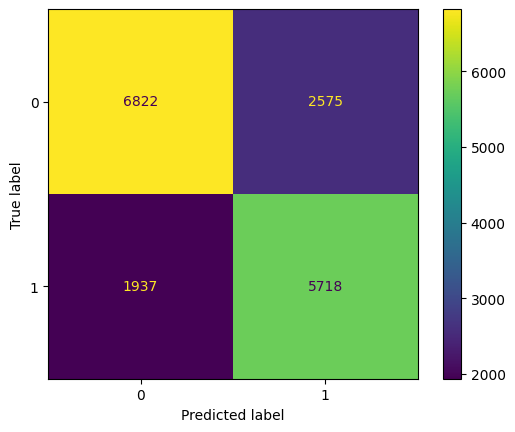

In [279]:
print(acc)
print(rec)
ConfusionMatrixDisplay(cm).plot()

In [282]:
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [285]:
import pickle
pickle.dump(best_xgb,open('xgb_classifier.pkl', 'wb'))

In [286]:
x_train.head(1)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category
6592,1,152,76.0,120,80,1,1,0,0,1,56,32.894737,Hypertension Stage 1


In [287]:
len(ct.get_feature_names_out())

15

In [288]:
ct.get_feature_names_out()[6:9]

array(['ohe__bp_category_Hypertension Stage 1',
       'ohe__bp_category_Hypertension Stage 2', 'ohe__bp_category_Normal'],
      dtype=object)

In [289]:
x_train['bp_category'].unique()

array(['Hypertension Stage 1', 'Hypertension Stage 2', 'Normal',
       'Elevated'], dtype=object)

In [290]:
x_train.shape

(51153, 13)

In [291]:
x_train_transformerd[3][6:9]

array([1., 0., 0.])

In [292]:
x_train.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category
6592,1,152,76.0,120,80,1,1,0,0,1,56,32.894737,Hypertension Stage 1
59533,2,160,55.0,120,80,1,1,0,0,1,49,21.484375,Hypertension Stage 1
47712,1,163,73.0,120,80,2,2,0,0,0,47,27.475629,Hypertension Stage 1
30939,1,162,47.0,120,80,1,1,0,0,1,63,17.908855,Hypertension Stage 1
68091,1,159,62.0,160,100,1,1,0,0,1,61,24.524346,Hypertension Stage 2


In [293]:
x_train_transformerd

array([[-1.18181818,  0.23529412,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.45454545, -1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.18181818,  0.05882353,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.54545455, -0.64705882,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.09090909,  1.05882353,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.54545455,  1.47058824,  0.        , ...,  0.        ,
         0.        ,  0.        ]])